# LOAD DATA
## Data can be loaded as:
### df = pd.read_csv(filename)
### where filename can be defined as filename = 'url' if you are using an online link or 'filepath' if the data is on a local drive. If file type is xslx or txt then replace csv with xslx or txt

In [106]:
# The code was removed by Watson Studio for sharing.

,NUMBER,K,T,API,Pi,"Uoi, cp",Rsi,OOIP,Produced,RF
0,1,2.2,139,47.3,4105,0.36,1283,436,100,0.229358
1,2,4.2,105,41.0,1700,1.11,241,394,59,0.149746
2,3,1.5,110,33.0,1805,1.31,588,427,72,0.168618
3,4,9.9,158,50.2,3447,0.14,2383,242,38,0.157025
4,5,1.0,152,42.8,4482,0.46,1263,245,36,0.146939


In [107]:
%%capture
! pip install seaborn
import matplotlib as plot 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
import tensorflow
import pylab as pl
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn import datasets
%matplotlib inline

<h2 id="data_cleaning">Data Cleaning</h2>
Remove unnecessary columns and leaving on relevant features.

In [108]:
# Lets select some features that we want to use.

df_data = df_data.drop(df_data.columns[[0]], axis=1)
df_data.head(10)

,K,T,API,Pi,"Uoi, cp",Rsi,OOIP,Produced,RF
0,2.2,139,47.3,4105,0.36,1283,436,100,0.229358
1,4.2,105,41.0,1700,1.11,241,394,59,0.149746
2,1.5,110,33.0,1805,1.31,588,427,72,0.168618
3,9.9,158,50.2,3447,0.14,2383,242,38,0.157025
4,1.0,152,42.8,4482,0.46,1263,245,36,0.146939
5,4.5,194,52.0,5400,0.14,3539,83,5,0.060241
6,12.8,126,43.0,3515,0.68,575,585,202,0.345299
7,20.8,101,33.5,2020,0.98,773,571,83,0.145359
8,10.6,92,32.0,2100,2.74,169,541,42,0.077634
9,30.0,145,45.0,2534,0.22,1530,150,28,0.186667


In [109]:
df_data.dtypes

K            float64
T              int64
API          float64
Pi             int64
Uoi, cp      float64
Rsi            int64
OOIP           int64
Produced       int64
RF           float64
dtype: object

In [110]:
df_data.describe()

,K,T,API,Pi,"Uoi, cp",Rsi,OOIP,Produced,RF
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,79.758120,141.196581,38.499145,2665.350427,1.868547,734.094017,562.931624,119.299145,0.193882
std,151.245043,44.967850,6.119549,1612.150803,4.733689,596.391216,318.028483,124.542768,0.100869
min,0.100000,72.000000,22.000000,700.000000,0.100000,14.000000,59.000000,0.000000,0.000000
25%,5.000000,110.000000,34.000000,1535.000000,0.460000,350.000000,343.000000,41.000000,0.138340
50%,16.900000,132.000000,39.000000,2113.000000,0.960000,550.000000,530.000000,83.000000,0.170513
75%,74.000000,170.000000,42.800000,3620.000000,1.500000,939.000000,686.000000,141.000000,0.231388
max,1070.000000,270.000000,54.000000,9030.000000,45.200000,3539.000000,1540.000000,906.000000,0.618852


In [111]:
# Count missing data if present
missing_df_data = df_data.isnull()
for column in missing_df_data.columns.values.tolist():
    print(column)
    print (missing_df_data[column].value_counts())
    print("") 

K
False    117
Name: K, dtype: int64

T
False    117
Name: T, dtype: int64

API
False    117
Name: API, dtype: int64

Pi
False    117
Name: Pi, dtype: int64

Uoi, cp
False    117
Name: Uoi, cp, dtype: int64

Rsi
False    117
Name: Rsi, dtype: int64

OOIP
False    117
Name: OOIP, dtype: int64

Produced 
False    117
Name: Produced , dtype: int64

RF
False    117
Name: RF, dtype: int64



In [112]:
# Print number of missing data. Check RHOB column

print("number of NaN values for the column K :", df_data['K'].isnull().sum())
print("number of NaN values for the column T :", df_data['T'].isnull().sum())
print("number of NaN values for the column API :", df_data['API'].isnull().sum())
print("number of NaN values for the column Pi :", df_data['Pi'].isnull().sum())
print("number of NaN values for the column Uoi, cp :", df_data['Uoi, cp'].isnull().sum())
print("number of NaN values for the column Rsi :", df_data['Rsi'].isnull().sum())
print("number of NaN values for the column OOIP :", df_data['OOIP'].isnull().sum())
print("number of NaN values for the column Produced :", df_data['Produced '].isnull().sum())
print("number of NaN values for the column RF :", df_data['RF'].isnull().sum())

number of NaN values for the column K : 0
number of NaN values for the column T : 0
number of NaN values for the column API : 0
number of NaN values for the column Pi : 0
number of NaN values for the column Uoi, cp : 0
number of NaN values for the column Rsi : 0
number of NaN values for the column OOIP : 0
number of NaN values for the column Produced : 0
number of NaN values for the column RF : 0


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c252f4978>,
      dtype=object)

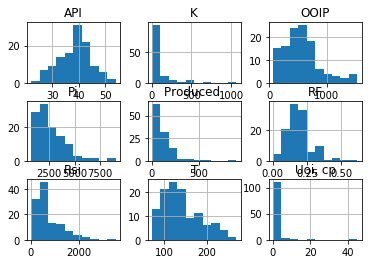

In [113]:
viz = df_data[['K', 'T', 'API', 'Pi', 'Uoi, cp', 'Rsi', 'OOIP', 'Produced ', 'RF']]
viz.hist()

In [114]:
df_data[['K', 'T', 'API', 'Pi', 'Uoi, cp', 'Rsi', 'OOIP', 'Produced ', 'RF']].corr()

,K,T,API,Pi,"Uoi, cp",Rsi,OOIP,Produced,RF
K,1.000000,0.091865,-0.110619,-0.056988,0.030356,-0.221819,0.653330,0.662257,0.394316
T,0.091865,1.000000,0.259931,0.769379,-0.266381,0.379589,-0.063788,0.067129,0.228601
API,-0.110619,0.259931,1.000000,0.354369,-0.418281,0.670496,-0.344658,-0.215564,0.104768
Pi,-0.056988,0.769379,0.354369,1.000000,-0.225770,0.610909,-0.270659,-0.047436,0.223420
"Uoi, cp",0.030356,-0.266381,-0.418281,-0.225770,1.000000,-0.259929,0.219295,0.006455,-0.113334
Rsi,-0.221819,0.379589,0.670496,0.610909,-0.259929,1.000000,-0.502011,-0.256378,0.049549
OOIP,0.653330,-0.063788,-0.344658,-0.270659,0.219295,-0.502011,1.000000,0.792149,0.319345
Produced,0.662257,0.067129,-0.215564,-0.047436,0.006455,-0.256378,0.792149,1.000000,0.715183
RF,0.394316,0.228601,0.104768,0.223420,-0.113334,0.049549,0.319345,0.715183,1.000000


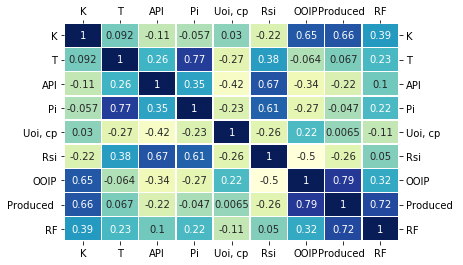

In [115]:
#Create Heatmap
corrmap = sns.heatmap(df_data.corr(), annot=True, cmap="YlGnBu", linewidths=.5,cbar=False)

#Set all sides
corrmap.tick_params(right=True, top=True, labelright=True, labeltop=True,rotation=0)

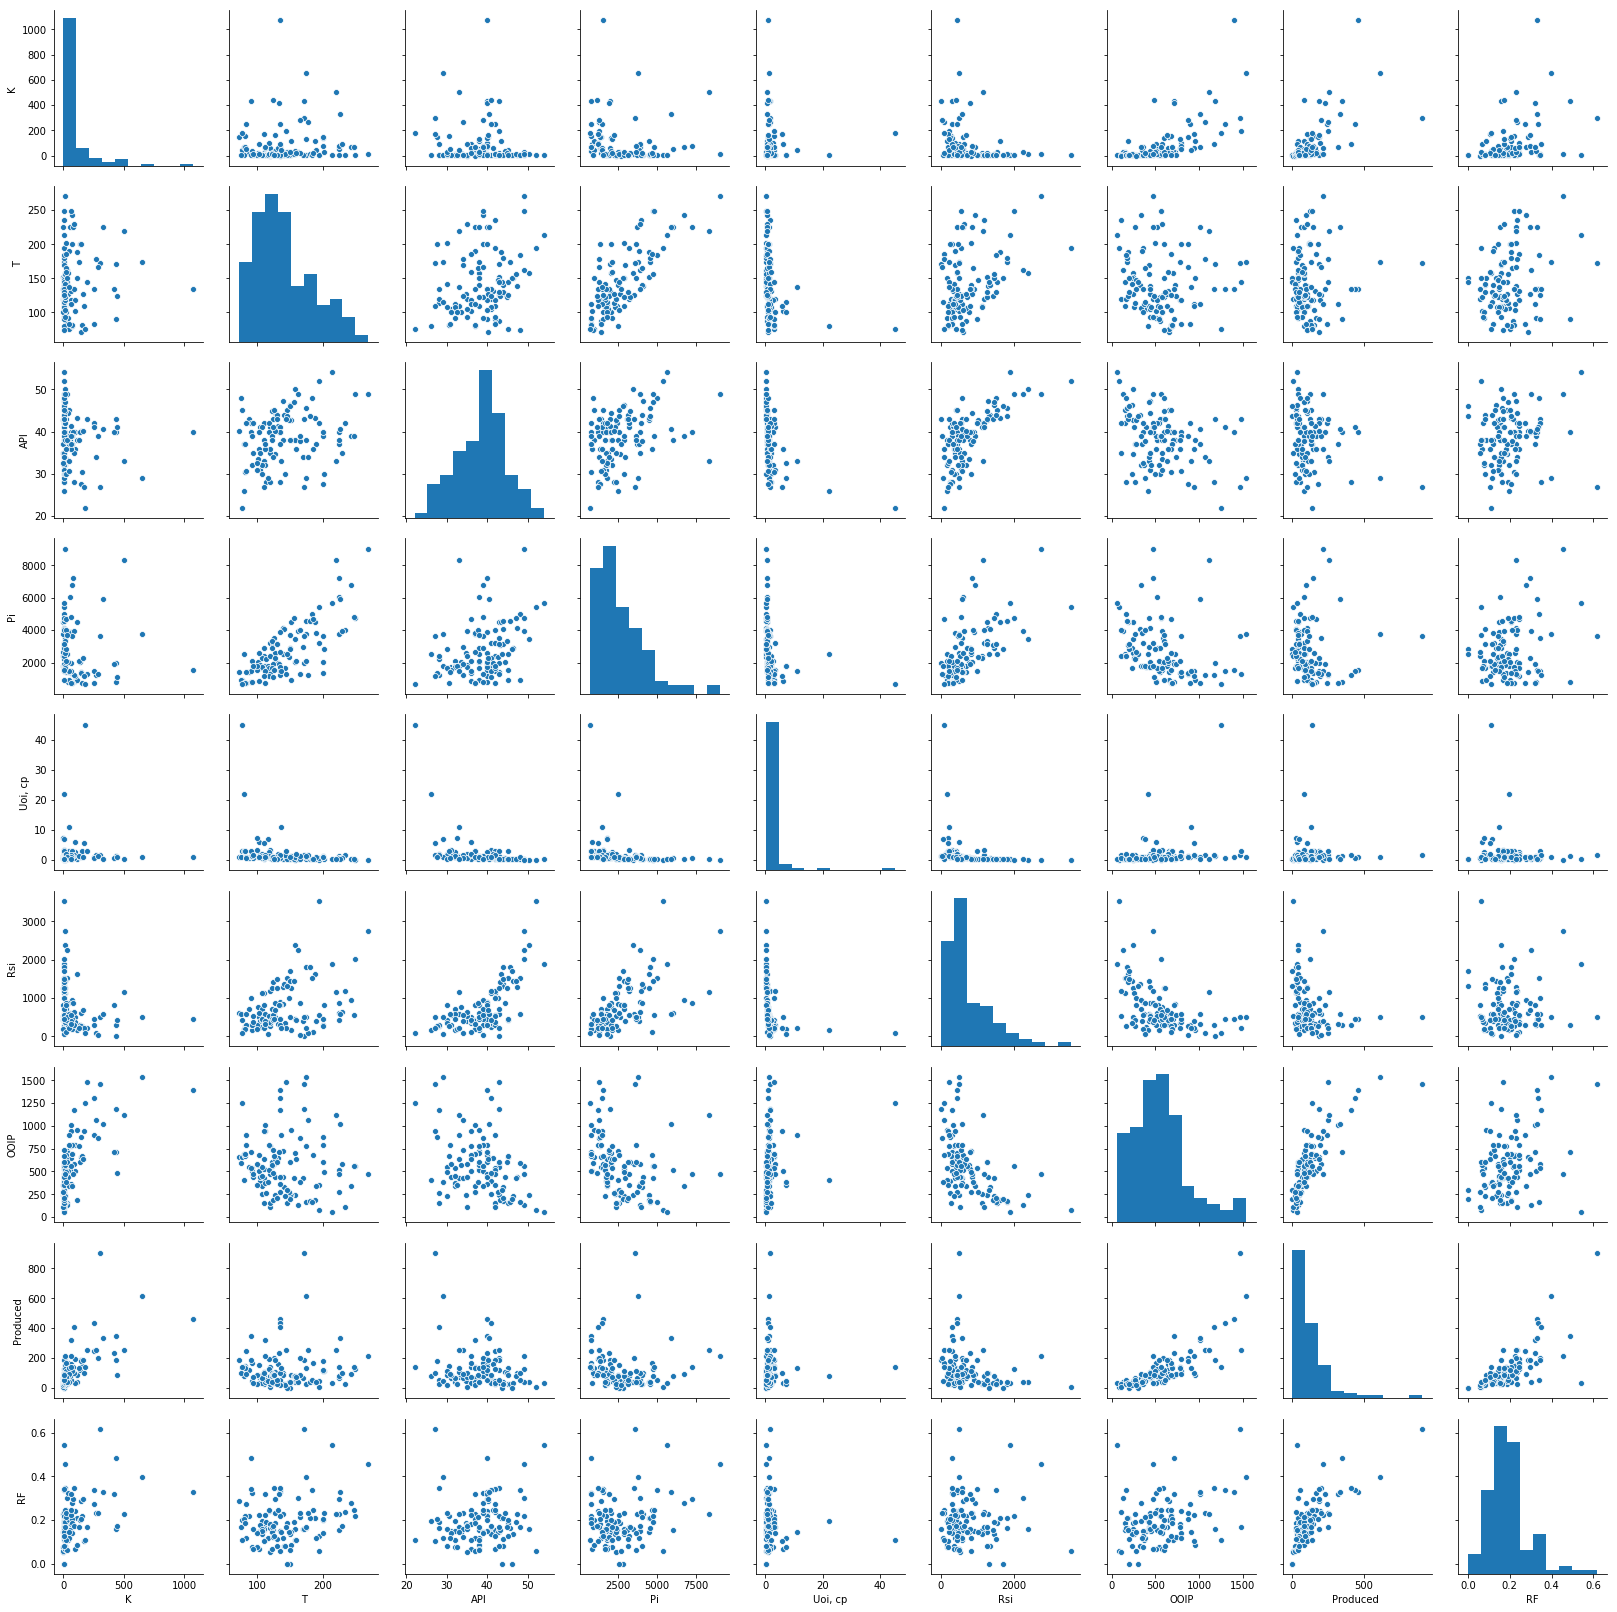

In [116]:
# Matrix of crossplots to visualize the variation between the parameters in the data set.
sns.pairplot(df_data[['K', 'T', 'API', 'Pi', 'Uoi, cp', 'Rsi', 'OOIP', 'Produced ', 'RF']])

<h2 id="feature_selection">Feature Selection</h2>
Before we start dropping the redundant independent variables, let us check the Variance inflation factor (VIF) among the independent variables. VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate’s standard deviation) of an estimated regression coefficient is increased because of collinearity. I will encourage you all to read the Wikipedia page on Variance inflation factor to gain a good understanding of it.

We calculate the VIF of each independent variables and print it. We will create a new DataFrame without RF as we aim to determine the VIF among the potential independent variables.

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
new_data = df_data
new_data.head()

,K,T,API,Pi,"Uoi, cp",Rsi,OOIP,Produced,RF
0,2.2,139,47.3,4105,0.36,1283,436,100,0.229358
1,4.2,105,41.0,1700,1.11,241,394,59,0.149746
2,1.5,110,33.0,1805,1.31,588,427,72,0.168618
3,9.9,158,50.2,3447,0.14,2383,242,38,0.157025
4,1.0,152,42.8,4482,0.46,1263,245,36,0.146939


In [119]:
new_data=new_data.drop(["RF"], axis=1)
vif = pd.DataFrame()
vif["features"] = new_data.columns
vif["vif_Factor"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]
print(vif)

    features  vif_Factor
0          K    2.445797
1          T   28.218270
2        API   22.101617
3         Pi   13.718019
4    Uoi, cp    1.386403
5        Rsi    6.994256
6       OOIP   17.994147
7  Produced     6.763014


In general, we should aim for the VIF of less than 10 for the independent variables.
Based on our understanding from heatmap and VIF result let us drop all columns with VIF above 10 as a potential candidate for the independent variable for our model and re-evaluate the VIF.

In [120]:
new_data = df_data.drop(["T", "API", "Pi", "OOIP"], axis=1)
new_data.head()

,K,"Uoi, cp",Rsi,Produced,RF
0,2.2,0.36,1283,100,0.229358
1,4.2,1.11,241,59,0.149746
2,1.5,1.31,588,72,0.168618
3,9.9,0.14,2383,38,0.157025
4,1.0,0.46,1263,36,0.146939
